In [5]:
import re
from pathlib import Path
import numpy as np
import json
import os
import re
import scipy

import pandas as pd

nam_dir = 'bnam/cox_dataset_clnum=2_fnum=5_cl_size=200/bbox=rf,radius=0.2/baselinenam_st_1'


def kl_div(y_true, y_pred):
    return sum(
        scipy.special.rel_entr(
            np.clip(y_true, a_min=1e-1, a_max=1e5),
            np.clip(y_pred, a_min=1e-1, a_max=1e5)
        )
    )


def parse_res(path: Path):
    with open(path) as fp:
        pt_id = int(re.search(string=str(path), pattern='pt=[0-9]+').group(0).split('=')[1])
        y_pred = np.array(json.load(fp)['importances'])

        cl0 = np.array([*[0.8, 0.15, 0.05], *[0] * 2])
        cl1 = np.array([*[0.8, 0.15, 0.05], *[0] * 2])[:: -1]
        y_true = cl0 if pt_id < 30 else cl1

        return dict(
            path=path,
            parent=path.parts[-2],
            y_true=y_true,
            y_pred=y_pred,
            mse=np.sqrt(np.sum((y_true - y_pred) ** 2)),
            lr=float(
                re.search(
                    string=path.parts[-2],
                    pattern='lr=.+?,'
                ).group(0).split('=')[-1][:-1]
            ),
            weight_decay=float(
                re.search(
                    string=path.parts[-2],
                    pattern='weight_decay=.+?,'
                ).group(0).split('=')[-1][:-1]
            ),
            pt_id=pt_id
        )


imps = pd.DataFrame(
    [
        parse_res(path=Path(f"{dir}/{file}"))
        for dir, subdirs, files in os.walk(nam_dir) for file in files if
        file == 'res.json' and 'criterion' in dir
    ]
)
imps

,path,parent,y_true,y_pred,mse,lr,weight_decay,pt_id
0,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[0.07316788285970688, 0.00016050037811510265, ...",0.743778,0.001,0.0,0
1,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[4.608851078558018e-09, 0.0042348625138401985,...",0.829542,0.010,0.0,0
2,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[0.0038970133755356073, 0.0010989505099132657,...",0.811335,0.001,0.0,1
3,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[0.0006431493093259633, 9.357459930470213e-05,...",0.814695,0.010,0.0,1
4,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[0.0001403644710080698, 0.00022705347510054708...",0.815034,0.001,0.0,2
5,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[3.0446219170698896e-05, 4.569544398691505e-05...",0.815415,0.010,0.0,2
6,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[0.0017038766527548432, 0.0014760438352823257,...",0.813510,0.001,0.0,3
7,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[0.5708815455436707, 0.0001831923727877438, 0....",0.278229,0.010,0.0,3
8,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[0.0012297102948650718, 0.0021213348954916, 0....",0.813595,0.001,0.0,4
9,bnam\cox_dataset_clnum=2_fnum=5_cl_size=200\bb...,"criterion=mse,max_epoch=250,mode=surv,optimize...","[0.8, 0.15, 0.05, 0.0, 0.0]","[0.0024833837524056435, 0.00026983278803527355...",0.812826,0.010,0.0,4


mse    Axes(0.125,0.11;0.775x0.77)
dtype: object

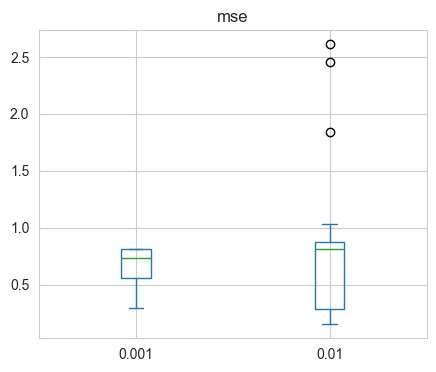

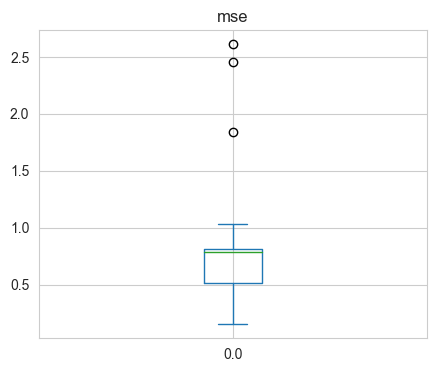

In [6]:
imps.plot.box(column="mse", by="lr", figsize=(5, 4))

imps.plot.box(column="mse", by="weight_decay", figsize=(5, 4))
